In [156]:
#importation

from sklearn.linear_model import Ridge
from ridge import RidgeRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV


In [157]:
def cross_validation_loo(X, Y, lambda_list):
    """
    Performs LOO cross-validation to find the best hyperparameter lambda for Ridge Regression.
    """

    lambda_losses = {lambda_val: [] for lambda_val in lambda_list}

    for partition in range(len(X)):
        # Create training and validation sets for the current fold
        if partition == 0:
            X_train = X[1:]
            Y_train = Y[1:]
        elif partition == len(X) - 1:
            X_train = X[:-1]
            Y_train = Y[:-1]
        else:
            X_train = np.concatenate([X[:partition], X[partition+1:]])
            Y_train = np.concatenate([Y[:partition], Y[partition+1:]])

        X_validation = X[partition:partition+1]
        Y_validation = Y[partition:partition+1]

        # Evaluate Ridge Regression for each lambda value
        for lambda_val in lambda_list:
            model = RidgeRegression(lambda_val)
            model.fit(X_train, Y_train)
            predictions = model.predict(X_validation)
            loss = mean_squared_error(Y_validation, predictions)
            lambda_losses[lambda_val].append(loss)

    # Calculate the average loss for each lambda and determine the best lambda
    lambda_avg_losses = {lambda_val: np.mean(losses) for lambda_val, losses in lambda_losses.items()}
    best_lambda = min(lambda_avg_losses, key=lambda_avg_losses.get)

    return best_lambda

In [167]:
db=pd.read_csv("olympics_100m.csv",sep='\t')
X=db['Year'].values.reshape(-1, 1)
y=db['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) #42
X_train=X_train.flatten().tolist()
X_test=X_test.flatten().tolist()
X_train = [[1] + [x] for x in X_train]
X_test = [[1] + [x] for x in X_test]
lambda_value = 231.2


In [171]:
model = RidgeRegression(lambda_value)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
# Évaluer la performance du modèle
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.01582487845912128


In [170]:
#liste_de_valeurs = [1, 10, 100, 1000, 10000]
liste_de_valeurs = np.linspace(1,10000,1000)
a=cross_validation_loo(X_train,y_train,liste_de_valeurs)
print("best lambda = ",a)

best lambda =  231.2072072072072


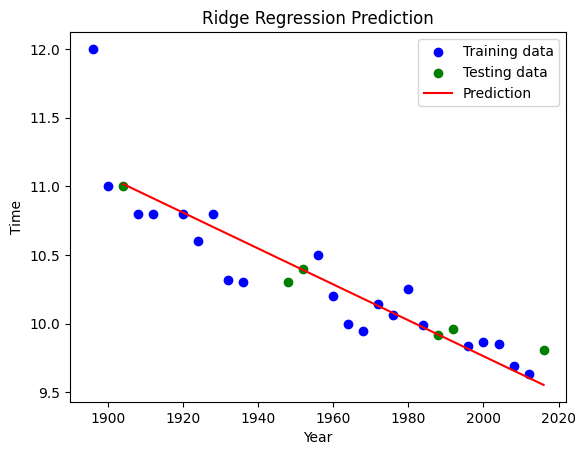

In [172]:
#Chatgpt help me to do the following plot.

X_train_np = np.array(X_train)[:, 1]  # delete the first column
X_test_np = np.array(X_test)[:, 1]  # delete the first column

# sort all datas for the visualisation.
sorted_indices = np.argsort(X_test_np)
sorted_X_test = X_test_np[sorted_indices]
sorted_predictions = np.array(predictions)[sorted_indices]

plt.scatter(X_train_np, y_train, color='blue', label='Training data')
plt.scatter(X_test_np, y_test, color='green', label='Testing data')
plt.plot(sorted_X_test, sorted_predictions, color='red', label='Prediction')
plt.title('Ridge Regression Prediction')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()
#end Chatgpt 

In [173]:
# Comparison with sklearn's RidgeCV

alphas = np.linspace(1, 10000, 1000)

# Creating and fitting the RidgeCV model with the defined alphas and sklearn will use the LOO cross-validation per default
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

# Finding the best alpha and displaying it
best_alpha = ridge_cv.alpha_
print("The best alpha is:", best_alpha)
# Using the best model to make predictions on the test set
predictions = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Le meilleur alpha est : 231.2072072072072
Mean Squared Error: 0.015824856195621795
